# Atheism in Brazil

## Introduction

While listening to the audiobook of Richard Dawkin"s [*The God Delusion*](https://www.audible.co.uk/pd/The-God-Delusion-Audiobook/B004FUH0A4), I began to wonder about whether atheism was common in Brazil. I had been living in Brazil for a few years. From my personal experience, I had infered that many Brazilians were deeply spiritual people. It seemed like the perfect opportunity to practise using Python for data analysis. 

In this report, I hope to use public datasets to answer the questions: 

- What percentage of the Brazilian population identify as atheists?
- Is the percentage of people who identify as atheists in Brazil changing significantly? 

For this analysis, I use the [*Population by religion, sex and urban/rural residence*](https://data.un.org/Data.aspx?q=religion&d=POP&f=tableCode%3a28) database, which I discovered using [UNdata](https://data.un.org/), a search engine for finding databases provided by the United Nations.


## Preparation

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math

The first step is to download the "Population by religion, sex and urban/rural residence" dataset from the United Nations Statistics Division website (see above for a link to the data source). To manipulate and visualize the dataset, we use the Pandas library to create a dataframe object.

In [3]:
columns = ["Country or Area", "Year", "Area", "Sex", "Religion", "Record Type", "Reliability", "Source Year", "Value", "Value Footnotes"]
dtype = {"Country or Area": str, "Year": str, "Area": str, "Sex": str, "Religion": str, "Record Type": str, "Reliability": str, "Source Year": str, "Value": str, "Value Footnotes": str}
df = pd.read_csv(filepath_or_buffer="./UNdata_Export_20221107_181521214.csv", usecols=columns, dtype=dtype)
df

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
0,Albania,2011,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2013,2800138,NaN
1,Albania,2011,Total,Both Sexes,Atheist,Census - de jure - complete tabulation,"Final figure, complete",2013,69995,NaN
2,Albania,2011,Total,Both Sexes,Catholic,Census - de jure - complete tabulation,"Final figure, complete",2013,280921,NaN
3,Albania,2011,Total,Both Sexes,Evangelical,Census - de jure - complete tabulation,"Final figure, complete",2013,3797,NaN
4,Albania,2011,Total,Both Sexes,Muslim,Census - de jure - complete tabulation,"Final figure, complete",2013,1587608,NaN
...,...,...,...,...,...,...,...,...,...,...
22429,85,Data of mini-census taken in 2017.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22430,86,Data refer to resident population.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22431,87,Excluding population enumerated in hotels.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22432,88,"Other includes Orthodox, Bahai, Other Christia...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The data is long, at over 22 thousand rows. We only need the data from Brazil, so we filter out all the observations where the "Country or Area" field is not "Brazil".

In [4]:
df_brazil = df.loc[df["Country or Area"] == "Brazil"]
df_brazil

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
3003,Brazil,2010,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2011,190755799,NaN
3004,Brazil,2010,Total,Both Sexes,Adventist,Census - de jure - complete tabulation,"Final figure, complete",2011,1561071,NaN
3005,Brazil,2010,Total,Both Sexes,Assembly of God,Census - de jure - complete tabulation,"Final figure, complete",2011,12314410,NaN
3006,Brazil,2010,Total,Both Sexes,Baptist,Census - de jure - complete tabulation,"Final figure, complete",2011,3723853,NaN
3007,Brazil,2010,Total,Both Sexes,Buddhist,Census - de jure - complete tabulation,"Final figure, complete",2011,243966,NaN
...,...,...,...,...,...,...,...,...,...,...
3313,Brazil,2000,Rural,Female,Spiritualist,Census - de jure - complete tabulation,"Final figure, complete",2002,28493.747,10
3314,Brazil,2000,Rural,Female,Umbanda e Candomblé,Census - de jure - complete tabulation,"Final figure, complete",2002,8218.969,10
3315,Brazil,2000,Rural,Female,Other Religions,Census - de jure - complete tabulation,"Final figure, complete",2002,129029.309,10
3316,Brazil,2000,Rural,Female,No Religion,Census - de jure - complete tabulation,"Final figure, complete",2002,616865.112,10


There are still a lot of rows to the dataframe object. However, we can see that they fall broadly into either data from 2000 or from 2010. So we filter the data into dataframes for both years.

In [5]:
df_brazil_2000 = df_brazil.loc[df_brazil["Year"] == "2000"]
df_brazil_2000

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
3246,Brazil,2000,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2002,169872856,10
3247,Brazil,2000,Total,Both Sexes,Catholic,Census - de jure - complete tabulation,"Final figure, complete",2002,124980132.072,10
3248,Brazil,2000,Total,Both Sexes,Evangelical,Census - de jure - complete tabulation,"Final figure, complete",2002,26184941.345,10
3249,Brazil,2000,Total,Both Sexes,Spiritualist,Census - de jure - complete tabulation,"Final figure, complete",2002,2262401.15,10
3250,Brazil,2000,Total,Both Sexes,Umbanda e Candomblé,Census - de jure - complete tabulation,"Final figure, complete",2002,525012.396,10
...,...,...,...,...,...,...,...,...,...,...
3313,Brazil,2000,Rural,Female,Spiritualist,Census - de jure - complete tabulation,"Final figure, complete",2002,28493.747,10
3314,Brazil,2000,Rural,Female,Umbanda e Candomblé,Census - de jure - complete tabulation,"Final figure, complete",2002,8218.969,10
3315,Brazil,2000,Rural,Female,Other Religions,Census - de jure - complete tabulation,"Final figure, complete",2002,129029.309,10
3316,Brazil,2000,Rural,Female,No Religion,Census - de jure - complete tabulation,"Final figure, complete",2002,616865.112,10


In [6]:
df_brazil_2010 = df_brazil.loc[df_brazil["Year"] == "2010"]
df_brazil_2010

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
3003,Brazil,2010,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2011,190755799,NaN
3004,Brazil,2010,Total,Both Sexes,Adventist,Census - de jure - complete tabulation,"Final figure, complete",2011,1561071,NaN
3005,Brazil,2010,Total,Both Sexes,Assembly of God,Census - de jure - complete tabulation,"Final figure, complete",2011,12314410,NaN
3006,Brazil,2010,Total,Both Sexes,Baptist,Census - de jure - complete tabulation,"Final figure, complete",2011,3723853,NaN
3007,Brazil,2010,Total,Both Sexes,Buddhist,Census - de jure - complete tabulation,"Final figure, complete",2011,243966,NaN
...,...,...,...,...,...,...,...,...,...,...
3241,Brazil,2010,Rural,Female,Other Traditional Evangelical,Census - de jure - complete tabulation,"Final figure, complete",2011,299464,NaN
3242,Brazil,2010,Rural,Female,Roman Apostolic Catholic,Census - de jure - complete tabulation,"Final figure, complete",2011,10916778,NaN
3243,Brazil,2010,Rural,Female,Umbanda,Census - de jure - complete tabulation,"Final figure, complete",2011,4253,NaN
3244,Brazil,2010,Rural,Female,Universal of the Kingdom of God,Census - de jure - complete tabulation,"Final figure, complete",2011,59328,NaN


Next, we see that the data distinguishes between information from "Both Sexes", "Male" and "Female" in the "Sex" column. Since that distinction is irrelevant for this analysis, we filter out the "Male" and "Female" entries.

In [7]:
df_brazil_2000_bothSexes = df_brazil_2000.loc[df_brazil_2000["Sex"] == "Both Sexes"]
df_brazil_2000_bothSexes

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
3246,Brazil,2000,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2002,169872856,10
3247,Brazil,2000,Total,Both Sexes,Catholic,Census - de jure - complete tabulation,"Final figure, complete",2002,124980132.072,10
3248,Brazil,2000,Total,Both Sexes,Evangelical,Census - de jure - complete tabulation,"Final figure, complete",2002,26184941.345,10
3249,Brazil,2000,Total,Both Sexes,Spiritualist,Census - de jure - complete tabulation,"Final figure, complete",2002,2262401.15,10
3250,Brazil,2000,Total,Both Sexes,Umbanda e Candomblé,Census - de jure - complete tabulation,"Final figure, complete",2002,525012.396,10
3251,Brazil,2000,Total,Both Sexes,Other Religions,Census - de jure - complete tabulation,"Final figure, complete",2002,3044012.671,10
3252,Brazil,2000,Total,Both Sexes,No Religion,Census - de jure - complete tabulation,"Final figure, complete",2002,12492402.681,10
3253,Brazil,2000,Total,Both Sexes,Not Specified,Census - de jure - complete tabulation,"Final figure, complete",2002,383953.479,10
3270,Brazil,2000,Urban,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2002,137925237.869,10
3271,Brazil,2000,Urban,Both Sexes,Catholic,Census - de jure - complete tabulation,"Final figure, complete",2002,98475958.558,10


In [8]:
df_brazil_2010_bothSexes = df_brazil_2010.loc[df_brazil_2010["Sex"] == "Both Sexes"]
df_brazil_2010_bothSexes

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
3003,Brazil,2010,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2011,190755799,NaN
3004,Brazil,2010,Total,Both Sexes,Adventist,Census - de jure - complete tabulation,"Final figure, complete",2011,1561071,NaN
3005,Brazil,2010,Total,Both Sexes,Assembly of God,Census - de jure - complete tabulation,"Final figure, complete",2011,12314410,NaN
3006,Brazil,2010,Total,Both Sexes,Baptist,Census - de jure - complete tabulation,"Final figure, complete",2011,3723853,NaN
3007,Brazil,2010,Total,Both Sexes,Buddhist,Census - de jure - complete tabulation,"Final figure, complete",2011,243966,NaN
...,...,...,...,...,...,...,...,...,...,...
3187,Brazil,2010,Rural,Both Sexes,Other Traditional Evangelical,Census - de jure - complete tabulation,"Final figure, complete",2011,579394,NaN
3188,Brazil,2010,Rural,Both Sexes,Roman Apostolic Catholic,Census - de jure - complete tabulation,"Final figure, complete",2011,23224277,NaN
3189,Brazil,2010,Rural,Both Sexes,Umbanda,Census - de jure - complete tabulation,"Final figure, complete",2011,8825,NaN
3190,Brazil,2010,Rural,Both Sexes,Universal of the Kingdom of God,Census - de jure - complete tabulation,"Final figure, complete",2011,106998,NaN


The dataset also distinguishes between data from "Rural" and "Urban" populations as well as the "Total" in the "Area" field. Since this analysis is about Brazil as a whole, specific areas are not relevant to our problem and we filter out the "Urban" and "Rural" observations.

In [9]:
df_brazil_2000_bothSexes_totalArea = df_brazil_2000_bothSexes.loc[df_brazil_2000_bothSexes["Area"] == "Total"]
df_brazil_2000_bothSexes_totalArea

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
3246,Brazil,2000,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2002,169872856,10
3247,Brazil,2000,Total,Both Sexes,Catholic,Census - de jure - complete tabulation,"Final figure, complete",2002,124980132.072,10
3248,Brazil,2000,Total,Both Sexes,Evangelical,Census - de jure - complete tabulation,"Final figure, complete",2002,26184941.345,10
3249,Brazil,2000,Total,Both Sexes,Spiritualist,Census - de jure - complete tabulation,"Final figure, complete",2002,2262401.15,10
3250,Brazil,2000,Total,Both Sexes,Umbanda e Candomblé,Census - de jure - complete tabulation,"Final figure, complete",2002,525012.396,10
3251,Brazil,2000,Total,Both Sexes,Other Religions,Census - de jure - complete tabulation,"Final figure, complete",2002,3044012.671,10
3252,Brazil,2000,Total,Both Sexes,No Religion,Census - de jure - complete tabulation,"Final figure, complete",2002,12492402.681,10
3253,Brazil,2000,Total,Both Sexes,Not Specified,Census - de jure - complete tabulation,"Final figure, complete",2002,383953.479,10


In [10]:
df_brazil_2010_bothSexes_totalArea = df_brazil_2010_bothSexes.loc[df_brazil_2010_bothSexes["Area"] == "Total"]
df_brazil_2010_bothSexes_totalArea

,Country or Area,Year,Area,Sex,Religion,Record Type,Reliability,Source Year,Value,Value Footnotes
3003,Brazil,2010,Total,Both Sexes,Total,Census - de jure - complete tabulation,"Final figure, complete",2011,190755799,NaN
3004,Brazil,2010,Total,Both Sexes,Adventist,Census - de jure - complete tabulation,"Final figure, complete",2011,1561071,NaN
3005,Brazil,2010,Total,Both Sexes,Assembly of God,Census - de jure - complete tabulation,"Final figure, complete",2011,12314410,NaN
3006,Brazil,2010,Total,Both Sexes,Baptist,Census - de jure - complete tabulation,"Final figure, complete",2011,3723853,NaN
3007,Brazil,2010,Total,Both Sexes,Buddhist,Census - de jure - complete tabulation,"Final figure, complete",2011,243966,NaN
3008,Brazil,2010,Total,Both Sexes,Jehovah Witness,Census - de jure - complete tabulation,"Final figure, complete",2011,1393208,NaN
3009,Brazil,2010,Total,Both Sexes,Jewish,Census - de jure - complete tabulation,"Final figure, complete",2011,107329,NaN
3010,Brazil,2010,Total,Both Sexes,Lutheran,Census - de jure - complete tabulation,"Final figure, complete",2011,999498,NaN
3011,Brazil,2010,Total,Both Sexes,Methodist,Census - de jure - complete tabulation,"Final figure, complete",2011,340938,NaN
3012,Brazil,2010,Total,Both Sexes,Presbyterian,Census - de jure - complete tabulation,"Final figure, complete",2011,921209,NaN


Our dataframe objects are more manageable now, with much shorter data. However, the data is still wide, with many fields that are irrelevant to our analysis. In fact, the only fields that do not contain repetitive or irrelevant data are "Religion" and "Value". We filter the remaining data further and remove all the series apart from the aforementioned.

In [11]:
brazilian_religions_2000 = df_brazil_2000_bothSexes_totalArea[["Religion", "Value"]].reset_index(drop=True)
brazilian_religions_2000["Value"] = brazilian_religions_2000["Value"].apply(lambda x: math.floor(float(x.strip())))
brazilian_religions_2000

,Religion,Value
0,Total,169872856
1,Catholic,124980132
2,Evangelical,26184941
3,Spiritualist,2262401
4,Umbanda e Candomblé,525012
5,Other Religions,3044012
6,No Religion,12492402
7,Not Specified,383953


In [12]:
brazilian_religions_2010 = df_brazil_2010_bothSexes_totalArea[["Religion", "Value"]].reset_index(drop=True)
brazilian_religions_2010["Value"] = brazilian_religions_2010["Value"].apply(lambda x: math.floor(float(x.strip())))
brazilian_religions_2010

,Religion,Value
0,Total,190755799
1,Adventist,1561071
2,Assembly of God,12314410
3,Baptist,3723853
4,Buddhist,243966
5,Jehovah Witness,1393208
6,Jewish,107329
7,Lutheran,999498
8,Methodist,340938
9,Presbyterian,921209


Finally, we remove the "Total" observation from both dataframes, so as not to skew the proportions later on. However, it is useful to know the value for calculating percentages, so we assign the population totals to variables and then drop the "Total" observations.

In [13]:
brazil_pop_2000 = brazilian_religions_2000.loc[brazilian_religions_2000["Religion"] == "Total"]["Value"]
brazilian_religions_2000 = brazilian_religions_2000.drop([0, 0])
print(f"BRAZIL POPULATION (2000): {brazil_pop_2000}")

BRAZIL POPULATION (2000): 0    169872856
Name: Value, dtype: int64


In [14]:

brazil_pop_2010 = brazilian_religions_2010.loc[brazilian_religions_2010["Religion"] == "Total"]["Value"]
brazilian_religions_2010 = brazilian_religions_2010.drop([0, 0])
print(f"BRAZIL POPULATION (2010): {brazil_pop_2010}")

BRAZIL POPULATION (2010): 0    190755799
Name: Value, dtype: int64


## Processing

Now that the data is cleaner, we can add a "Percentage" field and sort the data by "Value".

In [15]:
brazilian_religions_2000["Percentage"] = [float(x / brazil_pop_2000) for x in brazilian_religions_2000["Value"]]
brazilian_religions_2000.sort_values(by="Value", ascending=False, ignore_index=True).reset_index(drop=True)

,Religion,Value,Percentage
0,Catholic,124980132,0.735728
1,Evangelical,26184941,0.154144
2,No Religion,12492402,0.073540
3,Other Religions,3044012,0.017919
4,Spiritualist,2262401,0.013318
5,Umbanda e Candomblé,525012,0.003091
6,Not Specified,383953,0.002260


In [16]:
brazilian_religions_2010["Percentage"] = [float(x / brazil_pop_2010) for x in brazilian_religions_2010["Value"]]
brazilian_religions_2010.sort_values(by="Value", ascending=False, ignore_index=True).reset_index(drop=True)

,Religion,Value,Percentage
0,Roman Apostolic Catholic,123280172,0.646272
1,No Religion,15335510,0.080393
2,Assembly of God,12314410,0.064556
3,Other Traditional Evangelical,9358386,0.049060
4,Other Evangelical Pentecostal,8047813,0.042189
5,Espiritia,3848876,0.020177
6,Baptist,3723853,0.019522
7,Christian Congregation of Brazil,2289634,0.012003
8,Other Religions,1953260,0.010240
9,Universal of the Kingdom of God,1873243,0.009820


At this stage, we can see that there are a wide variety of religions included in the 2010 survey. Since the purpose of this analysis is not to discover how diverse religious belief is in Brazil, specifying the unique religions is not absolutely necessary. 

In the following steps, we summarize some of the Christian denominations into their corresponding branches. "Assembly of God" (Assemblies of God), "Other Traditional Evangelical", "Other Evangelical Pentecostal", "Christian Congregation of Brazil" (Christian Congregation in Brazil), "Universal of the Kingdom of God" (Universal Church of the Kingdom of God), "God is Love" (God is Love Pentecostal Church) and "Messianica" (Messianic Judaism) all fall under the category of denominations of Evangelical Protestant Christianity. For the sake of brevity, we find the sum of their membership values and assign it to a new observation called "Evangelical Protestants".

In [17]:
evangelical_denominations_religions = ["Assembly of God", "Other Traditional Evangelical", "Other Evangelical Pentecostal", "Christian Congregation of Brazil", "Universal of the Kingdom of God", "God is Love", "Messianica"]
total = 0

for denom in evangelical_denominations_religions:
    total += float(brazilian_religions_2010[brazilian_religions_2010["Religion"] == denom]["Value"])

brazilian_religions_2010 = pd.concat([brazilian_religions_2010, pd.DataFrame(data=[["Evangelical Protestant", total, float(total / brazil_pop_2010)]], columns=["Religion", "Value", "Percentage"])])
brazilian_religions_2010.sort_values(by="Percentage")

,Religion,Value,Percentage
10,Spiritualist,61739.0,0.000324
26,Messianica,103716.0,0.000544
6,Jewish,107329.0,0.000563
20,Orthodox Catholic,131571.0,0.000690
16,Candomble,167363.0,0.000877
14,Not Declared,241941.0,0.001268
4,Buddhist,243966.0,0.001279
8,Methodist,340938.0,0.001787
24,Umbanda,407331.0,0.002135
15,Brasilian Apostolic Catholic,560781.0,0.002940


As we did with Evangelical Protestantism, we can simplify the table further by combining the other Christian denominations into one "Other Christian Denomination". The denominations include "Adventist", "Baptist", "Jehovah Witness", "Lutheran", "Methodist", "Presbyterian", "Orthodox Catholic" (Eastern Orthodox) and "Brasilian Apostolic Catholic" (Brazilian Catholic Apostolic).

It is worth mentioning that there is potential for two subgroups within the "Other Christian Denomination" category, as it contains denominations that were created as consequents of different schisms in Christianity. For the purposes of this analysis, the distinction is unimportant. Furthermore, the membership of several of these denominations accounts for less than 1% of the population.

In [18]:
other_christian_denominations = ["Adventist", "Baptist", "Jehovah Witness", "Lutheran", "Methodist", "Presbyterian", "Orthodox Catholic", "Brasilian Apostolic Catholic"]
total = 0

for denom in other_christian_denominations:
    total += float(brazilian_religions_2010[brazilian_religions_2010["Religion"] == denom]["Value"])

brazilian_religions_2010 = pd.concat([brazilian_religions_2010, pd.DataFrame(data=[["Other Christian Denomination", total, float(total / brazil_pop_2010)]], columns=["Religion", "Value", "Percentage"])])

Although we have simplified the data, there are still a few responses that represent less than 1% of the population. For the sake of simplicity, we group the as of yet ungrouped religions with less than 1% membership into the category "Other Religions", and combine the "Not Specified" and "Not Declared" responses into "Invalid Response".

In [19]:
other_religions = ["Buddhist", "Spiritualist", "Candomble", "Umbanda", "Espiritia", "Jewish", "Other Religions"]
total1 = 0
invalid_responses = ["Not Specified", "Not Declared"]
total2 = 0
for religion in other_religions:
    total1 += float(brazilian_religions_2010[brazilian_religions_2010["Religion"] == religion]["Value"])

for response in invalid_responses:
    total2 += float(brazilian_religions_2010[brazilian_religions_2010["Religion"] == response]["Value"])

brazilian_religions_2010 = pd.concat([brazilian_religions_2010, pd.DataFrame(data=[["Other Religion", total1, float(total1 / brazil_pop_2010)]], columns=["Religion", "Value", "Percentage"])])
brazilian_religions_2010 = pd.concat([brazilian_religions_2010, pd.DataFrame(data=[["Invalid Response", total2, float(total2 / brazil_pop_2010)]], columns=["Religion", "Value", "Percentage"])])
brazilian_religions_2010

,Religion,Value,Percentage
1,Adventist,1561071.0,0.008184
2,Assembly of God,12314410.0,0.064556
3,Baptist,3723853.0,0.019522
4,Buddhist,243966.0,0.001279
5,Jehovah Witness,1393208.0,0.007304
6,Jewish,107329.0,0.000563
7,Lutheran,999498.0,0.005240
8,Methodist,340938.0,0.001787
9,Presbyterian,921209.0,0.004829
10,Spiritualist,61739.0,0.000324


Now we have the summarized observations and the redundant observations in the same table. For our penultimate data cleaning step, we remove the responses that we have summarized and make the "Religion" series the index.

In [20]:
brazilian_religions_2010.set_index("Religion", inplace=True)
for denom in evangelical_denominations_religions:
    brazilian_religions_2010.drop(denom, axis=0, inplace=True)

for denom in other_christian_denominations:
    brazilian_religions_2010.drop(denom, axis=0, inplace=True)

for religion in other_religions:
    brazilian_religions_2010.drop(religion, axis=0, inplace=True)

for response in invalid_responses:
    brazilian_religions_2010.drop(response, axis=0, inplace=True)

brazilian_religions_2010

,Value,Percentage
Religion,,
No Religion,15335510.0,0.080393
Roman Apostolic Catholic,123280172.0,0.646272
Evangelical Protestant,34832585.0,0.182603
Other Christian Denomination,9632129.0,0.050495
Other Religion,6789864.0,0.035595
Invalid Response,885539.0,0.004642


There were a few mistranslations and spelling mistakes in the original dataset, but the only one that remains is "Roman Apostolic Catholic" (an irregular translation of "Roman Catholic". We correct it and sort the final list by the "Percentage" field.

In [21]:
brazilian_religions_2010 = brazilian_religions_2010.rename({"Roman Apostolic Catholic": "Roman Catholic"}, axis="index")
brazilian_religions_2010.sort_values(by="Percentage", ascending=False)

,Value,Percentage
Religion,,
Roman Catholic,123280172.0,0.646272
Evangelical Protestant,34832585.0,0.182603
No Religion,15335510.0,0.080393
Other Christian Denomination,9632129.0,0.050495
Other Religion,6789864.0,0.035595
Invalid Response,885539.0,0.004642


Returning to the survey from 2000, we can see that there are fewer responses in comparison with 2010. Nevertheless, we summarize the responses in the same way as we did for 2010.

In [22]:
other_religions_2000 = ["Umbanda e Candomblé", "Spiritualist", "Other Religions"]
invalid_responses_2000 = ["Not Specified"]
total1 = 0
total2 = 0
for religion in other_religions_2000:
    total1 += int(brazilian_religions_2000[brazilian_religions_2000["Religion"] == religion]["Value"])

for response in invalid_responses_2000:
    total2 += int(brazilian_religions_2000[brazilian_religions_2000["Religion"] == response]["Value"])

brazilian_religions_2000 = pd.concat([brazilian_religions_2000, pd.DataFrame(data=[["Other Religion", int(total1), float(total1 / int(brazil_pop_2000))]], columns=["Religion", "Value", "Percentage"])])
brazilian_religions_2000 = pd.concat([brazilian_religions_2000, pd.DataFrame(data=[["Invalid Response", int(total2), float(total2 / int(brazil_pop_2000))]], columns=["Religion", "Value", "Percentage"])])
brazilian_religions_2000.set_index("Religion", inplace=True)
for religion in other_religions_2000:
    brazilian_religions_2000.drop(religion, axis=0, inplace=True)

for response in invalid_responses_2000:
    brazilian_religions_2000.drop(response, axis=0, inplace=True)

brazilian_religions_2000 = brazilian_religions_2000.rename({"Catholic": "Roman Catholic", "Evangelical": "Evangelical Protestant"}, axis="index")
brazilian_religions_2000.sort_values(by="Percentage", ascending=False)
brazilian_religions_2000

,Value,Percentage
Religion,,
Roman Catholic,124980132,0.735728
Evangelical Protestant,26184941,0.154144
No Religion,12492402,0.073540
Other Religion,5831425,0.034328
Invalid Response,383953,0.002260


For a more intuitive sense of the data, we present visualizations of the two dataframes as pie charts.

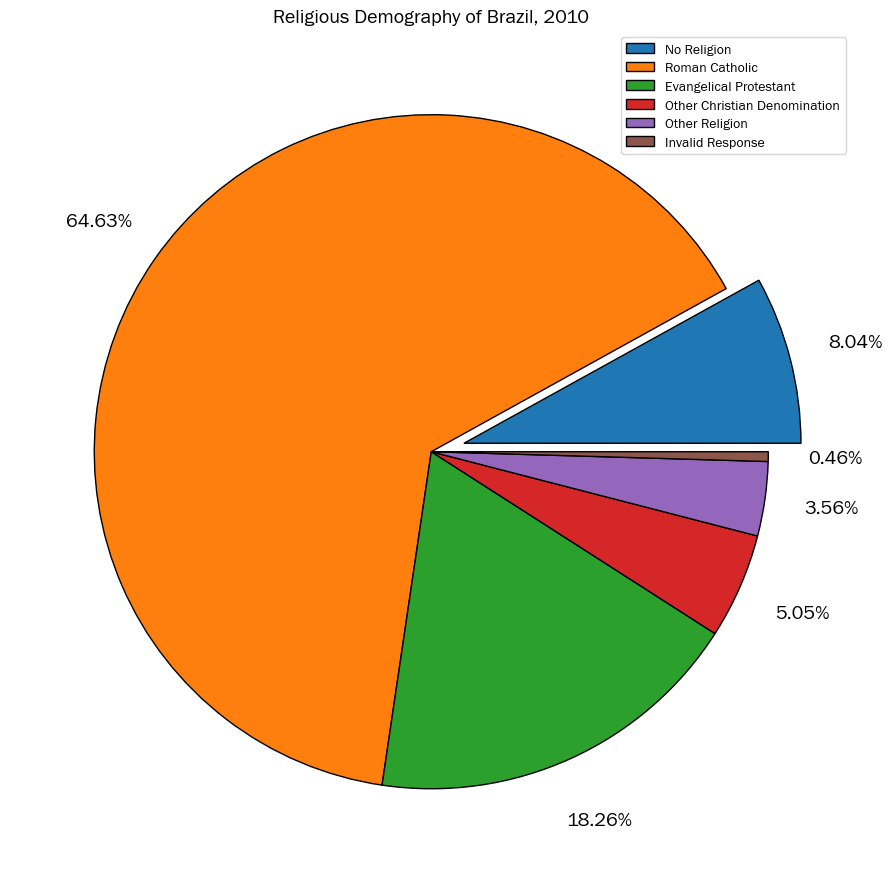

In [23]:
px = 1/plt.rcParams["figure.dpi"]
franklin_gothic = {"fontname":"Franklin Gothic Book", "fontsize": "x-large"}
labels = brazilian_religions_2010.index.tolist()
values = list(brazilian_religions_2010["Percentage"])
explode = [0.1, 0, 0, 0, 0, 0]
fig, ax = plt.subplots(figsize=(900*px, 900*px))

plt.style.use("seaborn-v0_8-pastel")
plt.pie(x=values, explode=explode, autopct="%.2f%%", textprops=franklin_gothic, wedgeprops={"edgecolor": "black"}, shadow=False, pctdistance=1.2)
plt.title("Religious Demography of Brazil, 2010", **franklin_gothic)
plt.legend(labels=labels, prop={"family": "Franklin Gothic Book"})
plt.tight_layout()
plt.show()

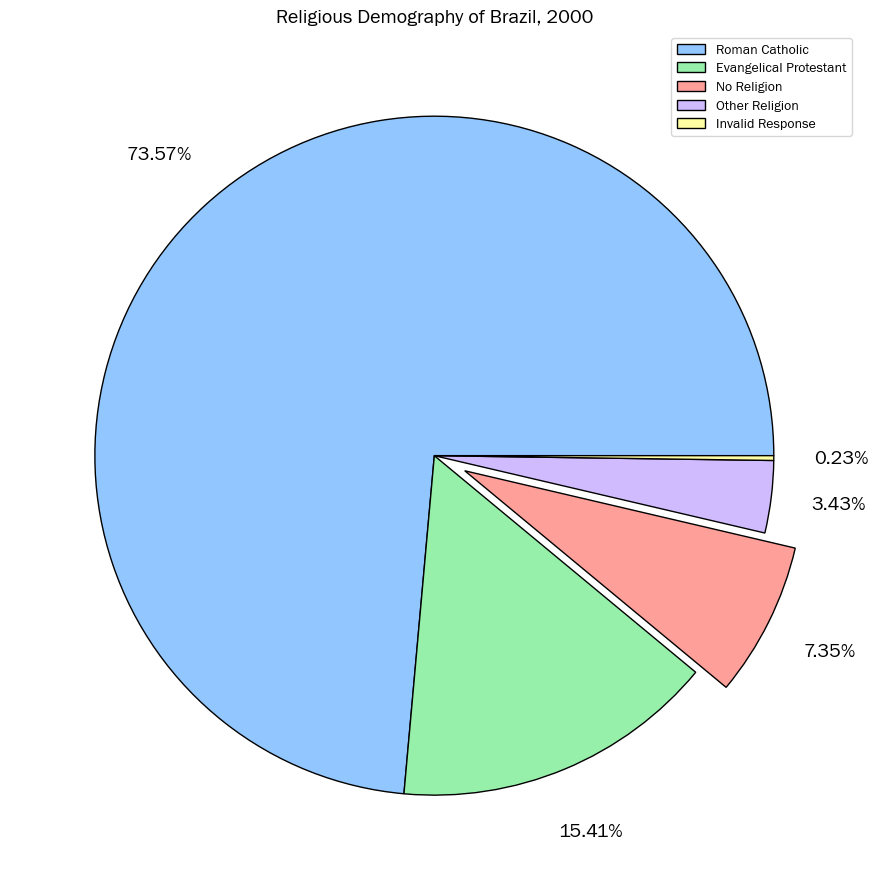

In [24]:
labels = brazilian_religions_2000.index.tolist()
values = list(brazilian_religions_2000["Percentage"])
explode = [0, 0, 0.1, 0, 0]
fig, ax = plt.subplots(figsize=(900*px, 900*px))

plt.style.use("seaborn-v0_8-pastel")
plt.pie(x=values, explode=explode, autopct="%.2f%%", textprops=franklin_gothic, wedgeprops={"edgecolor": "black"}, shadow=False, pctdistance=1.2)
plt.title("Religious Demography of Brazil, 2000", **franklin_gothic)
plt.legend(labels=labels, prop={"family": "Franklin Gothic Book"})
plt.tight_layout()
plt.show()

## Analysis

What stands out most in the data is the change in the percentage of Roman Catholics between 2000 and 2010. Brazil is the largest Catholic country in the world, but at the rate at which believers are migrating to other denominations, especially Evangelical Protestantism, it is probable that Mexico will overtake Brazil in the future. Indeed, the increase in the number of Evangelical Christians has led to a rise in the power of the Evangelical lobby and was one of the main voter bases of the outgoing Brazilian president, Jair Bolsonaro.

A category specifically for atheists is notably absent from the data. Instead we have the response "No Religion". Thus, an obvious limitation to our analysis that arises is the interpretation of irreligiosity. After all, an individual may claim to be irreligious, yet believe in the existence of a god. Solely measuring irreligiosity lumps irreligious theists, atheists and agnostics together and, awkwardly, the Brazilian census does not provide further information on the breakdown of the "No Religion" category. Therefore, we must work with what we have.

The increase in the proportion of "No Religion" responses between 2000 and 2010 was slight at 0.69%. If we make the assumption that atheists represented an equal or similar proportion of the "No Religion" category in both 2000 and 2010, then we can infer that the proportion of atheism in the Brazilian population also increased by approximately 0.69%.

[An electoral poll taken by DataFolha](https://www1.folha.uol.com.br/poder/2022/09/datafolha-eleitor-sem-religiao-da-38-pontos-de-vantagem-para-lula.shtml), a polling institute of the Grupo Folha media conglomerate, found that the percentage of individuals who reported they had no religion was 11%. The sample size was 6,800 people, from across 332 cities, with a 4% margin of error. Although the margin of error is notably high, it indicates that irreligiosity may have risen since 2010, at least in that sample.

At the time of writing, the 2020 Brazilian Census is still underway. It is unclear whether the census will make a distinction between non-religious theists and atheists, but I suspect that it will not. There is evidence to suggest the existence of a widespread prejudice against atheists in the Brazilian population. In 2007, [a study undertaken by CNT and Sensus](https://veja.abril.com.br/coluna/reinaldo/veja-5-so-13-dos-brasileiros-votariam-num-ateu-para-presidente/), reported that, in a presidential election, only 13% of Brazilians said they would vote for an atheist, in comparison to 84% for a black candidate, 57% for a female candidate, and 32% for a homosexual candidate. The phenomenon is reported in several articles, such as [an article written by the journalist André Bernardo for BBC Brasil](https://www.bbc.com/portuguese/brasil-37640191), as well as [a study by two professors of anthropology at the University of São Paulo (USP)](https://www.scielo.br/j/nec/a/GNZRR4mKD5Bbrj8QBM4QqCS/?lang=pt#), who are also researchers at the Brazilian Center for Analysis and Planning (Cebrap). Furthermore, I suspect that religious demographic surveys measure religious groups as a means of understanding how society is organized and, since atheists are mostly a disorganized group, measuring their membership as distinct from other irreligious individuals may not provide much useful insight for the government.

## Conclusion

Returning to our original problem, atheism may be growing in Brazil, although direct measurement is conspiciously absent. Instead, we must infer atheism from irreligiosity. In the articles previously mentioned, it is noted that atheism represented a minority even within the irreligious group. Thus, we can infer that the percentage of atheists in Brazil in 2000 was probably much less than 7.35%, but is likely on an upwards trend. If so, we can expect to see an increased tolerance towards atheists in Brazilian society as they come to represent a more substantial minority. However, such a change is likely to take place over the coming decades, rather than over the coming years. 